# Capstone Project
## Constrain Optimization
#### By: Pedro Rodriguez

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import gamma

from IPython.display import Math, Latex
from IPython.core.display import Image

In [2]:
pts = pd.read_excel(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/production_time_study_data.xlsx')
dt_freq = pd.read_excel(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/downtime_freq.xlsx')
dt_time = pd.read_excel(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/downtime_time.xlsx')

In [3]:
pts.head()

,area_py,station,task_number,manual_time,machine_time,production_line,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,station 1,1.0,task 1,1,2,1,115.0,119.0,114.0,129.0,...,129,122,119,119,120,124,121,116,125,123
1,station 1,1.0,task 2,1,0,1,167.0,154.0,180.0,172.0,...,159,163,169,154,161,170,160,152,157,163
2,station 1,1.0,task 3,0,2,1,110.0,100.0,105.0,120.0,...,110,109,110,107,118,108,118,116,113,106
3,station 1,1.0,task 4,1,0,1,45.0,49.0,50.0,48.0,...,46,48,44,45,60,57,51,51,54,48
4,station 1,1.0,task 5,1,0,1,44.0,48.0,45.0,47.0,...,44,41,45,41,47,43,48,49,42,46


In [4]:
dt_freq.head()

,station,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,...,month 15,month 16,month 17,month 18,month 19,month 20,month 21,month 22,month 23,month 24
0,station 1,8,5,4,4,5,8,3,3,5,...,5,8,5,7,9,8,9,8,10,7
1,station 2,8,6,3,5,3,3,4,6,4,...,10,5,10,5,9,4,4,4,4,5
2,station 3,4,4,3,4,3,4,4,4,3,...,4,4,4,4,6,4,5,4,5,4
3,station 4,7,6,6,6,5,6,4,4,5,...,7,9,7,7,6,8,9,9,6,7
4,station 5,6,5,4,5,4,3,4,3,5,...,5,7,6,5,6,5,8,8,6,5


In [5]:
dt_time.head()

,station,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,...,sample 91,sample 92,sample 93,sample 94,sample 95,sample 96,sample 97,sample 98,sample 99,sample 100
0,station 1,2942,2671,2625,1364,2949,752,1084,2332,1992,...,2676,2266,469,423,1586,1492,2501,1868,2018,2701
1,station 2,605,1113,559,1037,404,950,536,523,408,...,1210,944,1004,827,1123,1024,946,421,804,728
2,station 3,717,1319,592,1718,1195,2324,2045,1262,2246,...,1671,1439,1983,1132,1175,2089,1485,1755,2398,1568
3,station 4,1014,1705,1322,1013,1789,632,2016,1242,1708,...,1598,2015,785,1317,1853,1427,1586,1239,1408,1035
4,station 5,1743,1419,1849,1248,2133,1261,1007,2644,714,...,869,1365,1377,2741,1318,2136,907,2479,1686,1392


# Let's study the production time study

In [6]:
pts_s = pts

In [7]:
pts_s.head()

,area_py,station,task_number,manual_time,machine_time,production_line,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,station 1,1.0,task 1,1,2,1,115.0,119.0,114.0,129.0,...,129,122,119,119,120,124,121,116,125,123
1,station 1,1.0,task 2,1,0,1,167.0,154.0,180.0,172.0,...,159,163,169,154,161,170,160,152,157,163
2,station 1,1.0,task 3,0,2,1,110.0,100.0,105.0,120.0,...,110,109,110,107,118,108,118,116,113,106
3,station 1,1.0,task 4,1,0,1,45.0,49.0,50.0,48.0,...,46,48,44,45,60,57,51,51,54,48
4,station 1,1.0,task 5,1,0,1,44.0,48.0,45.0,47.0,...,44,41,45,41,47,43,48,49,42,46


In [8]:
#Let's regroup by station to see if every station have the same amount of data.
pts_s = pts_s.groupby('station').sum().T

In [9]:
pts_s.head()

station,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
manual_time,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,1.0,2.0,...,2.0,2.0,3.0000,2.0,2.0,2.0,1.0,2.0,2.0,3.0
machine_time,4.0,8.0,6.0,4.0,6.0,6.0,12.0,2.0,2.0,4.0,...,2.0,2.0,0.0000,2.0,2.0,2.0,2.0,2.0,4.0,12.0
production_line,5.0,5.0,8.0,6.0,8.0,6.0,14.0,2.0,3.0,9.0,...,18.0,18.0,18.0000,18.0,18.0,18.0,12.0,18.0,21.0,49.0
Unnamed: 6,481.0,111.0,29.0,35.0,301.0,211.0,90.0,19.0,76.0,216.0,...,110.0,71.0,60.5625,111.0,45.0,219.0,154.0,155.0,138.0,335.0
Unnamed: 7,470.0,103.0,34.0,37.0,292.0,226.0,106.0,20.0,67.0,249.0,...,123.0,84.0,61.5625,103.0,45.0,215.0,142.0,138.0,157.0,388.0


In [57]:
pts_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, manual_time to Unnamed: 105
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.0     103 non-null    float64
 1   2.0     103 non-null    float64
 2   3.0     103 non-null    float64
 3   4.0     103 non-null    float64
 4   5.0     103 non-null    float64
 5   6.0     103 non-null    float64
 6   7.0     103 non-null    float64
 7   8.0     103 non-null    float64
 8   9.0     103 non-null    float64
 9   10.0    103 non-null    float64
 10  11.0    103 non-null    float64
 11  12.0    103 non-null    float64
 12  13.0    103 non-null    float64
 13  14.0    103 non-null    float64
 14  15.0    103 non-null    float64
 15  16.0    103 non-null    float64
 16  17.0    103 non-null    float64
 17  18.0    103 non-null    float64
 18  19.0    103 non-null    float64
 19  20.0    103 non-null    float64
 20  21.0    103 non-null    float64
 21  22.0    103 non-null    f

In [11]:
#To study the data lets create the 'pts_test'.
pts_test = pts

In [12]:
pts_test.head()

,area_py,station,task_number,manual_time,machine_time,production_line,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,station 1,1.0,task 1,1,2,1,115.0,119.0,114.0,129.0,...,129,122,119,119,120,124,121,116,125,123
1,station 1,1.0,task 2,1,0,1,167.0,154.0,180.0,172.0,...,159,163,169,154,161,170,160,152,157,163
2,station 1,1.0,task 3,0,2,1,110.0,100.0,105.0,120.0,...,110,109,110,107,118,108,118,116,113,106
3,station 1,1.0,task 4,1,0,1,45.0,49.0,50.0,48.0,...,46,48,44,45,60,57,51,51,54,48
4,station 1,1.0,task 5,1,0,1,44.0,48.0,45.0,47.0,...,44,41,45,41,47,43,48,49,42,46


In [13]:
pts_test = pts.groupby('station').mean()
pts_test = pts_test.drop(['manual_time', 'machine_time'], axis=1)
pts_test.head()

,production_line,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
station,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,96.200000,94.000000,98.800000,103.2,99.600000,97.200000,98.400000,95.600000,97.40,...,97.600000,96.60,97.40,93.200000,101.20,100.400000,99.60,96.800000,98.20,97.200000
2.0,1.0,22.200000,20.600000,20.600000,20.8,19.800000,20.000000,21.000000,21.000000,21.00,...,21.800000,20.80,23.40,21.600000,22.80,21.800000,20.60,22.000000,21.80,21.000000
3.0,2.0,7.250000,8.500000,8.250000,7.5,8.500000,7.750000,8.000000,8.000000,8.00,...,7.750000,8.00,8.25,7.250000,8.50,7.750000,8.25,7.250000,7.75,7.750000
4.0,2.0,11.666667,12.333333,15.333333,15.0,14.666667,15.666667,15.333333,18.666667,16.00,...,12.333333,15.00,14.00,14.666667,15.00,15.333333,16.00,14.333333,12.00,15.666667
5.0,2.0,75.250000,73.000000,74.250000,76.0,73.750000,77.750000,72.000000,72.500000,73.25,...,76.250000,75.75,74.75,76.250000,75.75,72.000000,74.75,72.250000,73.25,75.750000


In [14]:
pts_test = pts_test.reset_index()
pts_test.head()

,station,production_line,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,1.0,1.0,96.200000,94.000000,98.800000,103.2,99.600000,97.200000,98.400000,95.600000,...,97.600000,96.60,97.40,93.200000,101.20,100.400000,99.60,96.800000,98.20,97.200000
1,2.0,1.0,22.200000,20.600000,20.600000,20.8,19.800000,20.000000,21.000000,21.000000,...,21.800000,20.80,23.40,21.600000,22.80,21.800000,20.60,22.000000,21.80,21.000000
2,3.0,2.0,7.250000,8.500000,8.250000,7.5,8.500000,7.750000,8.000000,8.000000,...,7.750000,8.00,8.25,7.250000,8.50,7.750000,8.25,7.250000,7.75,7.750000
3,4.0,2.0,11.666667,12.333333,15.333333,15.0,14.666667,15.666667,15.333333,18.666667,...,12.333333,15.00,14.00,14.666667,15.00,15.333333,16.00,14.333333,12.00,15.666667
4,5.0,2.0,75.250000,73.000000,74.250000,76.0,73.750000,77.750000,72.000000,72.500000,...,76.250000,75.75,74.75,76.250000,75.75,72.000000,74.75,72.250000,73.25,75.750000


In [15]:
pts_test1 = pd.melt(pts_test, id_vars=['station', 'production_line'])
pts_test1.head()

,station,production_line,variable,value
0,1.0,1.0,Unnamed: 6,96.200000
1,2.0,1.0,Unnamed: 6,22.200000
2,3.0,2.0,Unnamed: 6,7.250000
3,4.0,2.0,Unnamed: 6,11.666667
4,5.0,2.0,Unnamed: 6,75.250000


In [16]:
pts_test1 = pts_test1.rename(columns = {'variable': 'Sample', 'value': 'Cycle_time'})
pts_test1.head()

,station,production_line,Sample,Cycle_time
0,1.0,1.0,Unnamed: 6,96.200000
1,2.0,1.0,Unnamed: 6,22.200000
2,3.0,2.0,Unnamed: 6,7.250000
3,4.0,2.0,Unnamed: 6,11.666667
4,5.0,2.0,Unnamed: 6,75.250000


In [17]:
#Let's drop the sample column to have all cycle time of each station together.
pts_test2 = pts_test1.drop(columns = ['Sample'])
pts_test2.head()

,station,production_line,Cycle_time
0,1.0,1.0,96.200000
1,2.0,1.0,22.200000
2,3.0,2.0,7.250000
3,4.0,2.0,11.666667
4,5.0,2.0,75.250000


In [18]:
pts_test_station = pts_test2.groupby('station').mean()
pts_test_station.head()

,production_line,Cycle_time
station,,
1.0,1.0,97.462000
2.0,1.0,21.806000
3.0,2.0,7.795000
4.0,2.0,14.543333
5.0,2.0,74.682500


In [19]:
pts_test_station = pts_test_station.reset_index()
pts_test_station.head()

,station,production_line,Cycle_time
0,1.0,1.0,97.462000
1,2.0,1.0,21.806000
2,3.0,2.0,7.795000
3,4.0,2.0,14.543333
4,5.0,2.0,74.682500


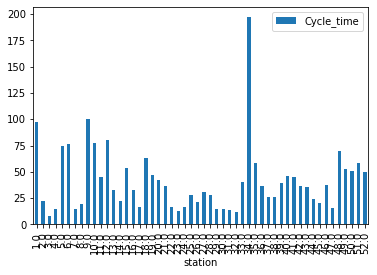

In [20]:
pts_test_station.plot(kind='bar', x='station', y='Cycle_time')

In [21]:
pts_test_line = pts_test_station.groupby('production_line').mean()
pts_test_line = pts_test_line.reset_index()
pts_test_line.head()

,production_line,station,Cycle_time
0,1.0,1.5,59.634000
1,2.0,5.5,34.555536
2,3.0,12.5,55.536979
3,4.0,19.0,41.077696
4,5.0,30.5,35.225422


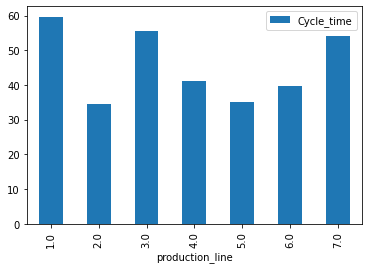

In [22]:
pts_test_line.plot(kind= 'bar', x= 'production_line', y='Cycle_time')

In [23]:
pts_stat_sec = pd.concat([pts_s.mean(), pts_s.std()], axis= 1)
pts_stat_sec.columns=['Mean(sec)', 'Standard Deviation(sec)']
pts_stat_sec.sort_values(by = 'station', ascending=True)

,Mean(sec),Standard Deviation(sec)
station,,
1.0,473.242718,82.591063
2.0,106.019417,18.276193
3.0,30.436893,4.647727
4.0,42.485437,8.550730
5.0,290.203883,49.926291
6.0,222.485437,38.665449
7.0,98.815534,17.380261
8.0,18.961165,3.392386
9.0,97.611650,27.674662


In [24]:
pts_stat_min = pd.concat([pts_s.mean()/60, pts_s.std()/60], axis= 1)
pts_stat_min.columns=['Mean ( Minutes )', 'Standard Deviation ( Minutes )']
pts_stat_min.sort_values(by = 'station', ascending=True)

,Mean ( Minutes ),Standard Deviation ( Minutes )
station,,
1.0,7.887379,1.376518
2.0,1.766990,0.304603
3.0,0.507282,0.077462
4.0,0.708091,0.142512
5.0,4.836731,0.832105
6.0,3.708091,0.644424
7.0,1.646926,0.289671
8.0,0.316019,0.056540
9.0,1.626861,0.461244


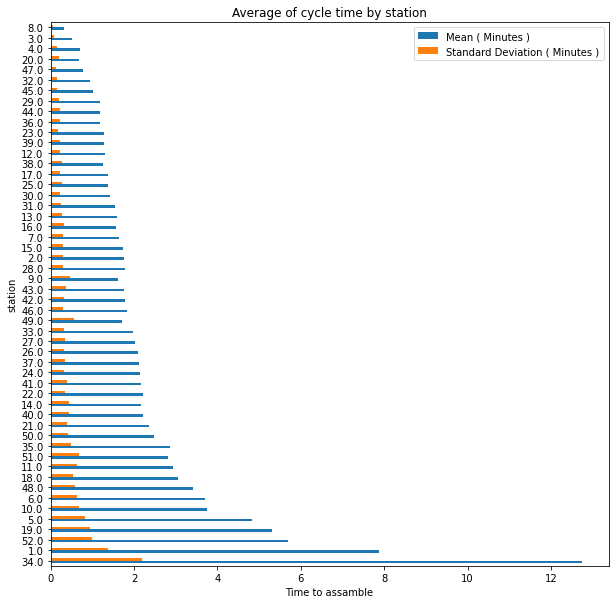

In [25]:
(pts_stat_min.reindex(index=pts_stat_min.mean(axis=1).sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10), title='Average of cycle time by station'))
plt.xlabel('Time to assamble');

In [26]:
pts_s.describe().T

,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
1.0,103.0,473.242718,82.591063,4.0,479.0,487.0,494.0,520.000000
2.0,103.0,106.019417,18.276193,4.0,105.0,109.0,112.0,127.000000
3.0,103.0,30.436893,4.647727,3.0,30.0,31.0,32.0,35.000000
4.0,103.0,42.485437,8.550730,3.0,40.0,44.0,47.0,58.000000
5.0,103.0,290.203883,49.926291,4.0,293.5,299.0,303.0,318.000000
6.0,103.0,222.485437,38.665449,3.0,224.0,228.0,234.0,248.000000
7.0,103.0,98.815534,17.380261,5.0,96.0,102.0,106.0,129.000000
8.0,103.0,18.961165,3.392386,1.0,18.0,19.0,21.0,22.000000
9.0,103.0,97.611650,27.674662,1.0,77.0,98.0,120.0,137.000000


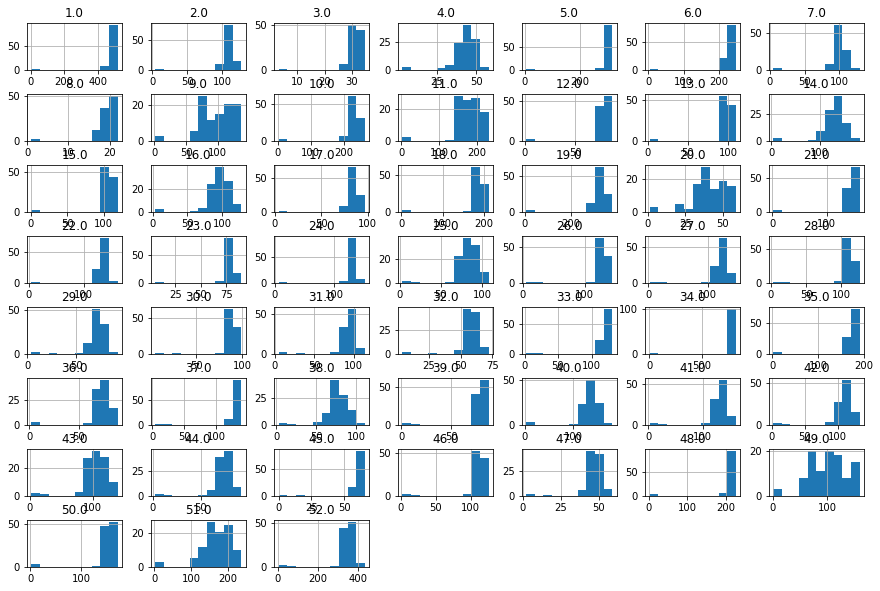

In [27]:
pts_s.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

# **Let's start to explore the downtime frequency**

In [28]:
dt_freq.head()

,station,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,...,month 15,month 16,month 17,month 18,month 19,month 20,month 21,month 22,month 23,month 24
0,station 1,8,5,4,4,5,8,3,3,5,...,5,8,5,7,9,8,9,8,10,7
1,station 2,8,6,3,5,3,3,4,6,4,...,10,5,10,5,9,4,4,4,4,5
2,station 3,4,4,3,4,3,4,4,4,3,...,4,4,4,4,6,4,5,4,5,4
3,station 4,7,6,6,6,5,6,4,4,5,...,7,9,7,7,6,8,9,9,6,7
4,station 5,6,5,4,5,4,3,4,3,5,...,5,7,6,5,6,5,8,8,6,5


In [29]:
dt_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   station   52 non-null     object
 1   month 1   52 non-null     int64 
 2   month 2   52 non-null     int64 
 3   month 3   52 non-null     int64 
 4   month 4   52 non-null     int64 
 5   month 5   52 non-null     int64 
 6   month 6   52 non-null     int64 
 7   month 7   52 non-null     int64 
 8   month 8   52 non-null     int64 
 9   month 9   52 non-null     int64 
 10  month 10  52 non-null     int64 
 11  month 11  52 non-null     int64 
 12  month 12  52 non-null     int64 
 13  month 13  52 non-null     int64 
 14  month 14  52 non-null     int64 
 15  month 15  52 non-null     int64 
 16  month 16  52 non-null     int64 
 17  month 17  52 non-null     int64 
 18  month 18  52 non-null     int64 
 19  month 19  52 non-null     int64 
 20  month 20  52 non-null     int64 
 21  month 21  52 non-n

**We will change the month to date format to make it easy to study the data**

In [30]:
dt1 = dt_freq.rename(columns = {'month 1':'2018-01-01', 
                                'month 2':'2018-02-01', 
                                'month 3':'2018-03-01', 
                                'month 4':'2018-04-01',
                                'month 5':'2018-05-01',
                                'month 6':'2018-06-01',
                                'month 7':'2018-07-01',
                                'month 8':'2018-08-01',
                                'month 9':'2018-09-01',
                                'month 10':'2018-10-01',
                                'month 11':'2018-11-01',
                                'month 12':'2018-12-01',
                                'month 13':'2019-01-01', 
                                'month 14':'2019-02-01', 
                                'month 15':'2019-03-01', 
                                'month 16':'2019-04-01',
                                'month 17':'2019-05-01',
                                'month 18':'2019-06-01',
                                'month 19':'2019-07-01',
                                'month 20':'2019-08-01',
                                'month 21':'2019-09-01',
                                'month 22':'2019-10-01',
                                'month 23':'2019-11-01',
                                'month 24':'2019-12-01'})
dt1


,station,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,...,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
0,station 1,8,5,4,4,5,8,3,3,5,...,5,8,5,7,9,8,9,8,10,7
1,station 2,8,6,3,5,3,3,4,6,4,...,10,5,10,5,9,4,4,4,4,5
2,station 3,4,4,3,4,3,4,4,4,3,...,4,4,4,4,6,4,5,4,5,4
3,station 4,7,6,6,6,5,6,4,4,5,...,7,9,7,7,6,8,9,9,6,7
4,station 5,6,5,4,5,4,3,4,3,5,...,5,7,6,5,6,5,8,8,6,5
5,station 6,11,4,5,4,5,6,6,5,8,...,6,5,15,13,12,9,4,13,15,9
6,station 7,9,4,8,7,5,6,5,6,7,...,8,12,8,7,14,10,9,8,13,9
7,station 8,12,5,8,8,6,6,5,6,8,...,13,10,11,7,15,8,14,7,11,10
8,station 9,10,8,5,9,7,8,7,6,8,...,10,11,11,12,8,5,12,13,13,9
9,station 10,6,5,6,6,4,6,4,4,6,...,5,8,4,4,6,8,8,5,4,5


In [31]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   station     52 non-null     object
 1   2018-01-01  52 non-null     int64 
 2   2018-02-01  52 non-null     int64 
 3   2018-03-01  52 non-null     int64 
 4   2018-04-01  52 non-null     int64 
 5   2018-05-01  52 non-null     int64 
 6   2018-06-01  52 non-null     int64 
 7   2018-07-01  52 non-null     int64 
 8   2018-08-01  52 non-null     int64 
 9   2018-09-01  52 non-null     int64 
 10  2018-10-01  52 non-null     int64 
 11  2018-11-01  52 non-null     int64 
 12  2018-12-01  52 non-null     int64 
 13  2019-01-01  52 non-null     int64 
 14  2019-02-01  52 non-null     int64 
 15  2019-03-01  52 non-null     int64 
 16  2019-04-01  52 non-null     int64 
 17  2019-05-01  52 non-null     int64 
 18  2019-06-01  52 non-null     int64 
 19  2019-07-01  52 non-null     int64 
 20  2019-08-01  

In [32]:
dt1.insert(1, "station_no.", [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                            21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
                            41,42,43,44,45,46,47,48,49,50,51,52], True)
dt1

,station,station_no.,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,...,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
0,station 1,1,8,5,4,4,5,8,3,3,...,5,8,5,7,9,8,9,8,10,7
1,station 2,2,8,6,3,5,3,3,4,6,...,10,5,10,5,9,4,4,4,4,5
2,station 3,3,4,4,3,4,3,4,4,4,...,4,4,4,4,6,4,5,4,5,4
3,station 4,4,7,6,6,6,5,6,4,4,...,7,9,7,7,6,8,9,9,6,7
4,station 5,5,6,5,4,5,4,3,4,3,...,5,7,6,5,6,5,8,8,6,5
5,station 6,6,11,4,5,4,5,6,6,5,...,6,5,15,13,12,9,4,13,15,9
6,station 7,7,9,4,8,7,5,6,5,6,...,8,12,8,7,14,10,9,8,13,9
7,station 8,8,12,5,8,8,6,6,5,6,...,13,10,11,7,15,8,14,7,11,10
8,station 9,9,10,8,5,9,7,8,7,6,...,10,11,11,12,8,5,12,13,13,9
9,station 10,10,6,5,6,6,4,6,4,4,...,5,8,4,4,6,8,8,5,4,5


In [33]:
dt2 = pd.melt(dt1, id_vars=['station', 'station_no.'])
dt2.head()

,station,station_no.,variable,value
0,station 1,1,2018-01-01,8
1,station 2,2,2018-01-01,8
2,station 3,3,2018-01-01,4
3,station 4,4,2018-01-01,7
4,station 5,5,2018-01-01,6


In [34]:
dt2 = dt2.rename(columns = {'variable': 'Date', 'value': 'Downtime'})
dt2

,station,station_no.,Date,Downtime
0,station 1,1,2018-01-01,8
1,station 2,2,2018-01-01,8
2,station 3,3,2018-01-01,4
3,station 4,4,2018-01-01,7
4,station 5,5,2018-01-01,6
...,...,...,...,...
1243,station 48,48,2019-12-01,5
1244,station 49,49,2019-12-01,7
1245,station 50,50,2019-12-01,3
1246,station 51,51,2019-12-01,5


In [35]:
dt2.dtypes

station        object
station_no.     int64
Date           object
Downtime        int64
dtype: object

In [36]:
dt2['Date'] = pd.to_datetime(dt2["Date"])
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      1248 non-null   object        
 1   station_no.  1248 non-null   int64         
 2   Date         1248 non-null   datetime64[ns]
 3   Downtime     1248 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 39.1+ KB


# Visualize the downtime data through time to find any pattern

In [37]:
dt2_graph1 = dt2[dt2['station'] == 'station 1']
dt2_graph2 = dt2[dt2['station'] == 'station 2']
dt2_graph3 = dt2[dt2['station'] == 'station 3']
dt2_graph4 = dt2[dt2['station'] == 'station 4']
dt2_graph5 = dt2[dt2['station'] == 'station 5']

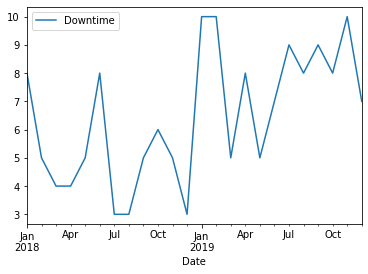

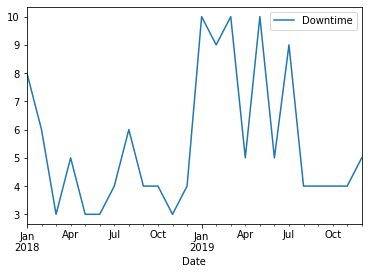

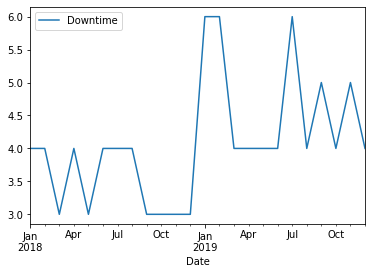

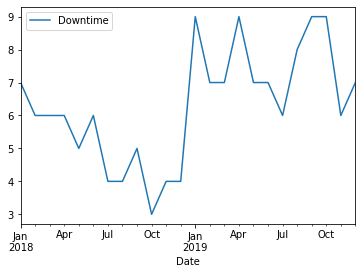

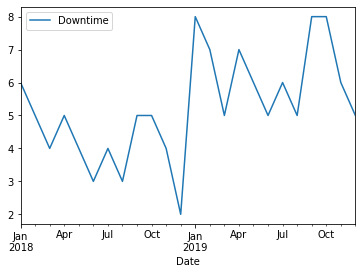

In [38]:
dt2_graph1.plot(kind= 'line', x= 'Date', y= 'Downtime')
dt2_graph2.plot(kind= 'line', x= 'Date', y= 'Downtime')
dt2_graph3.plot(kind= 'line', x= 'Date', y= 'Downtime')
dt2_graph4.plot(kind= 'line', x= 'Date', y= 'Downtime')
dt2_graph5.plot(kind= 'line', x= 'Date', y= 'Downtime')

**We are noticing an increasing pattern of Downtime in the first 5 station, So lets keep investigating if the rest of the station have the same pattern.**

In [39]:
#Let's create a column of year to divided by year and see if there is any pattern by years.
dt2['Year'] = dt2['Date'].apply(lambda t:t.year)
dt2

,station,station_no.,Date,Downtime,Year
0,station 1,1,2018-01-01,8,2018
1,station 2,2,2018-01-01,8,2018
2,station 3,3,2018-01-01,4,2018
3,station 4,4,2018-01-01,7,2018
4,station 5,5,2018-01-01,6,2018
...,...,...,...,...,...
1243,station 48,48,2019-12-01,5,2019
1244,station 49,49,2019-12-01,7,2019
1245,station 50,50,2019-12-01,3,2019
1246,station 51,51,2019-12-01,5,2019


In [40]:
#let's create a new table with station, year, downtime to see the behavior of the station through the year.
dt3 = dt2.groupby(by=['station_no.', 'station', 'Year']).mean()
dt3 = dt3.reset_index()
dt3.sample(20)

,station_no.,station,Year,Downtime
85,43,station 43,2019,4.666667
15,8,station 8,2019,11.000000
16,9,station 9,2018,7.583333
96,49,station 49,2018,4.333333
4,3,station 3,2018,3.500000
61,31,station 31,2019,5.500000
40,21,station 21,2018,4.916667
22,12,station 12,2018,6.500000
21,11,station 11,2019,5.500000
68,35,station 35,2018,4.583333


In [41]:
dt3.sort_values(by=['station_no.'], ascending=True)

,station_no.,station,Year,Downtime
0,1,station 1,2018,4.916667
1,1,station 1,2019,8.000000
2,2,station 2,2018,4.416667
3,2,station 2,2019,6.583333
4,3,station 3,2018,3.500000
...,...,...,...,...
99,50,station 50,2019,3.916667
100,51,station 51,2018,3.500000
101,51,station 51,2019,5.666667
102,52,station 52,2018,6.500000


**In the table in 2018, we can see stations 1 and 2 have a lower downtime frequency than in 2019. And we can see the same behavior for stations 51 and 52.**

In [42]:
#Let's regroup by date to see how the data behave by month. 
dt5 = dt2.groupby(by=['Date']).mean()
dt5.head(5)

,station_no.,Downtime,Year
Date,,,
2018-01-01,26.5,7.346154,2018.0
2018-02-01,26.5,4.750000,2018.0
2018-03-01,26.5,4.730769,2018.0
2018-04-01,26.5,4.826923,2018.0
2018-05-01,26.5,4.576923,2018.0


In [43]:
del dt5['station_no.']
del dt5['Year']
dt5.head()

,Downtime
Date,
2018-01-01,7.346154
2018-02-01,4.750000
2018-03-01,4.730769
2018-04-01,4.826923
2018-05-01,4.576923


In [44]:
dt5 = dt5.reset_index()
dt5.head()

,Date,Downtime
0,2018-01-01,7.346154
1,2018-02-01,4.750000
2,2018-03-01,4.730769
3,2018-04-01,4.826923
4,2018-05-01,4.576923


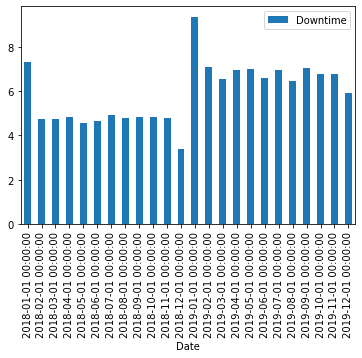

In [45]:
dt5.plot(kind= 'bar', x='Date', y='Downtime')

**The bar chart shows in January of 2018 and 2019 had the most downtimes than the other month. These findings can happen because the company stops production in mid-December for almost a month to perform the next year's re-layout changes. This deduction can also explain why in December, the frequencies are lower than the other months. The graph also showed in 2019, the frequency of downtimes are considerably higher than in 2018.**

Earlier, we saw that in 2019, stations 1 and 2 have higher downtime frequency than in 2018. Now let's investigate if every station has the same behavior and what is the growth ratio.

In [46]:
#Lets create a formula to carculate the growth ratio
def downtime_increasing_ratio(d):
    year_2018 = float(d['Downtime'][d['Year'] == 2018])
    year_2019 = float(d['Downtime'][d['Year'] == 2019])
    ratio = [(year_2019/year_2018)]
    return ratio

In [47]:
downtime_increasing_ratio(dt3[dt3['station']== 'station 1'])

[1.6271186440677965]

In [48]:
growth_ratio = {}

In [49]:
for a in dt3['station_no.'].unique():
    station = dt3[dt3['station_no.'] == a]
    growth_ratio[a] = downtime_increasing_ratio(station)
    
print(growth_ratio)

{1: [1.6271186440677965], 2: [1.490566037735849], 3: [1.3333333333333335], 4: [1.5166666666666666], 5: [1.5199999999999998], 6: [1.6756756756756757], 7: [1.5789473684210527], 8: [1.5903614457831325], 9: [1.3406593406593406], 10: [1.129032258064516], 11: [1.1379310344827587], 12: [1.358974358974359], 13: [1.265625], 14: [1.4883720930232556], 15: [1.28], 16: [1.2266666666666668], 17: [1.2181818181818183], 18: [1.2467532467532467], 19: [1.2199999999999998], 20: [1.2083333333333333], 21: [1.6101694915254237], 22: [1.5540540540540542], 23: [1.263157894736842], 24: [1.3333333333333333], 25: [1.3066666666666666], 26: [1.647887323943662], 27: [1.28125], 28: [1.5999999999999999], 29: [1.2702702702702702], 30: [1.6470588235294117], 31: [1.4042553191489362], 32: [1.7560975609756098], 33: [1.4761904761904763], 34: [1.4565217391304346], 35: [1.3636363636363638], 36: [1.2037037037037037], 37: [1.8955223880597016], 38: [1.5606060606060608], 39: [1.4], 40: [1.0399999999999998], 41: [1.3043478260869565

In [50]:
dt4 = pd.DataFrame(growth_ratio)

In [51]:
dt4.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,1.627119,1.490566,1.333333,1.516667,1.52,1.675676,1.578947,1.590361,1.340659,1.129032,...,1.272727,1.191489,1.468085,1.630435,1.825,1.45098,1.980769,1.175,1.619048,1.75641


In [52]:
dt4 = dt4.T
dt4.head()

,0
1,1.627119
2,1.490566
3,1.333333
4,1.516667
5,1.520000


In [53]:
dt4 = dt4.reset_index()
dt4.head()

,index,0
0,1,1.627119
1,2,1.490566
2,3,1.333333
3,4,1.516667
4,5,1.520000


In [54]:
dt4.rename(columns = {'index' : 'station_no.', 0 : 'DT_growth_ratio'}, inplace=True)
dt4.head(52)

,station_no.,DT_growth_ratio
0,1,1.627119
1,2,1.490566
2,3,1.333333
3,4,1.516667
4,5,1.520000
5,6,1.675676
6,7,1.578947
7,8,1.590361
8,9,1.340659
9,10,1.129032


**As we presumed, every station raised the downtime frequency from 2018 to 2019. Some stations like station 37 and station 47 almost double the downtime frequency throughout the year.**